# Machine Learning 3 - Support Vector Machines

A SVM classifier builds a set of hyper-planes to try and separate the data by maximizing the distance between the borders and the data points.

![SVM](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png "Decision border in an SVM")

This separation is generally not possible to achieve in the original data space. Therefore, the first step of the SVM is to project the data into a high or infinite dimensions space in which this linear separation can be done. The projection can be done with linear, polynomial, or more comonly "RBF" kernels.

In [56]:
from lab_tools import CIFAR10, evaluate_classifier, get_hog_image

dataset = CIFAR10('./CIFAR10/')

Pre-loading training data
Pre-loading test data


In [ ]:
# Project data in a new space with a kernel so in this hyper space it is  liearly separable
# Hyper-parameters to analyze: 
# - Kernel function (linear,rbf,..)
# - Reguralization parameters (relax the condition of having a perfect linear to prevent 
# overfitting, so allow errors but penalize the error with a regulatization term, the more penalization 
# the more we force linear separation): C the error penalty
# - 1v1 or 1 v rest

**Build a simple SVM** using [the SVC (Support Vector Classfiication) from sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). 
**Train** it on the CIFAR dataset.

In [120]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

svc = SVC(C=10, gamma='scale')
svc.fit(dataset.train['hog'], dataset.train['labels'])


SVC(C=10)

In [5]:
from sklearn.metrics import accuracy_score

In [121]:
pred = svc.predict(dataset.train['hog'])
print(pred.shape)

score = accuracy_score(dataset.train['labels'], pred)
print(f'Descriptive accuracy : {score}')

(15000,)
Descriptive accuracy : 0.9996666666666667


In [122]:
pred = svc.predict(dataset.test['hog'])
print(pred.shape)

score = accuracy_score(dataset.test['labels'], pred)
print(f'Predictive accuracy : {score}')

(3000,)
Predictive accuracy : 0.8253333333333334


**Explore the classifier**. How many support vectors are there? What are support vectors?

In [123]:
all_support_vectors = svc.support_vectors_ #Each line = 1 "Support Vector" ; 1024 columns forming a 32x32 image 
print(all_support_vectors.shape)

vectors_per_class = svc.n_support_ #Number of "Support Vector" for each class
print(vectors_per_class)



(9460, 256)
[2984 3791 2685]


**Try to find the best "C" (error penalty) and "gamma" parameters** using cross-validation. What influence does "C" have on the number of support vectors?

## Original

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


parameter_space = {
    'C': [1, 10, 50, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr']
    
}

svc = SVC()


grid_search = GridSearchCV(estimator=svc, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(dataset.train['hog'], dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_svc = grid_search.best_estimator_
best_svc.fit(dataset.train['hog'], dataset.train['labels'])

test_accuracy = best_svc.score(dataset.test['hog'], dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  19.2s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  18.6s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  18.1s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  10.6s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  10.5s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  10.5s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  15.2s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  14.6s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  14.2s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid; total time=  10.3s
[CV] END C=1, decision_function_shape=ovo, gamma=sca

[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  30.3s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  26.3s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  24.9s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  25.0s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  11.1s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  10.8s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  10.6s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  10.5s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  11.1s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  11.1s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  19.1s
[CV] END C=5

[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  23.9s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  23.8s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  23.3s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  26.0s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  25.9s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  26.0s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  22.7s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  23.8s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time= 3.5min
Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8194666666666667
Test Accuracy with Best Model: 0.8253333333333334


In [ ]:
#Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
#Best Score: 0.8194666666666667
#Test Accuracy with Best Model: 0.8253333333333334

## Normalized [-1,1]

In [57]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_11_train = scaler.fit_transform(dataset.train['hog'])
normalized_11_test = scaler.fit_transform(dataset.test['hog'])

In [58]:
print(normalized_11_train.shape)
print(normalized_11_train.max(axis=0).max())
print(normalized_11_train.min(axis=0).min())

(15000, 256)
1.0
-1.0


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


parameter_space = {
    'C': [1, 10, 50, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr']
    
}

svc = SVC()


grid_search = GridSearchCV(estimator=svc, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(normalized_11_train, dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_svc = grid_search.best_estimator_
best_svc.fit(normalized_11_train, dataset.train['labels'])

test_accuracy = best_svc.score(normalized_11_test, dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  14.5s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  13.9s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  13.6s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  48.6s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  48.0s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  47.3s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  18.7s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  19.2s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  18.9s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid; total time=  29.1s
[CV] END C=1, decision_function_shape=ovo, gamma=sca

[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  17.4s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  18.3s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  18.7s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  18.7s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  58.4s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  55.1s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  56.1s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  48.6s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  49.6s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  50.0s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  27.6s
[CV] END C=5

[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  13.5s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  13.5s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  13.6s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  16.9s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  17.2s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  17.0s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  15.3s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  15.1s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=  15.5s
Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8194
Test Accuracy with Best Model: 0.718


In [ ]:
#Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
#Best Score: 0.8194
#Test Accuracy with Best Model: 0.718

## PCA 

In [59]:
from sklearn.decomposition import PCA

In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_01_train = scaler.fit_transform(dataset.train['hog'])
normalized_01_test = scaler.fit_transform(dataset.test['hog'])

In [61]:
print(normalized_01_train.shape)
print(normalized_01_train.max(axis=0).max())
print(normalized_01_train.min(axis=0).min())

(15000, 256)
1.0
0.0


In [62]:
pca = PCA(n_components=0.80)

PCA_train = pca.fit_transform(normalized_01_train)
PCA_test = pca.transform(normalized_01_test)

In [63]:
print(PCA_train.shape)
print(PCA_train.max(axis=0).max())
print(PCA_train.min(axis=0).min())
print(PCA_test.shape)
print(PCA_test.max(axis=0).max())
print(PCA_test.min(axis=0).min())

(15000, 116)
1.1091062857756568
-0.7826208610830095
(3000, 116)
1.2691781141414178
-0.9675240988040121


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


parameter_space = {
    'C': [1, 10, 50, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr']
    
}

svc = SVC()


grid_search = GridSearchCV(estimator=svc, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(PCA_train, dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_svc = grid_search.best_estimator_
best_svc.fit(PCA_train, dataset.train['labels'])

test_accuracy = best_svc.score(PCA_test, dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=   8.1s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=   7.7s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=   7.9s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  12.0s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  11.7s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=  11.5s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  14.9s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  15.0s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  14.6s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid; total time=   9.2s
[CV] END C=1, decision_function_shape=ovo, gamma=sca

[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  11.5s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   7.8s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   7.6s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   7.5s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  10.0s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  10.3s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  10.2s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   9.0s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   9.7s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   8.6s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  13.2s
[CV] END C=5

[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  11.2s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  11.4s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  11.3s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   9.7s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   9.8s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   9.4s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   6.1s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   6.2s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   6.2s
Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8173333333333334
Test Accuracy with Best Model: 0.778


In [ ]:
#Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
#Best Score: 0.8173333333333334
#Test Accuracy with Best Model: 0.778

## PCA normalized [-1,1]

In [52]:
scaler = MinMaxScaler(feature_range=(-1, 1))
PCA_11_train = scaler.fit_transform(PCA_train)
PCA_11_test = scaler.fit_transform(PCA_test)

In [53]:
print(PCA_11_train.shape)
print(PCA_11_train.max(axis=0).max())
print(PCA_11_train.min(axis=0).min())

(15000, 116)
1.0000000000000004
-1.0


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


parameter_space = {
    'C': [1, 10, 50, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr']
    
}

svc = SVC()


grid_search = GridSearchCV(estimator=svc, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(PCA_11_train, dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_svc = grid_search.best_estimator_
best_svc.fit(PCA_11_train, dataset.train['labels'])

test_accuracy = best_svc.score(PCA_11_test, dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=   5.8s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=   5.8s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=   5.8s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   6.8s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   6.8s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   6.9s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  11.4s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  11.4s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  11.2s
[CV] END C=1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid; total time=   6.9s
[CV] END C=1, decision_function_shape=ovo, gamma=sca

[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   9.7s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   7.1s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   6.9s
[CV] END C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   7.0s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  27.3s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  27.7s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=linear; total time=  28.8s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   9.9s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   8.8s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   8.0s
[CV] END C=50, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=  14.3s
[CV] END C=5

[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  11.2s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  11.8s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=  11.4s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  10.3s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  10.2s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=  10.0s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   6.8s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   6.8s
[CV] END C=100, decision_function_shape=ovr, gamma=auto, kernel=sigmoid; total time=   6.6s
Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.7981333333333334
Test Accuracy with Best Model: 0.732


In [ ]:
#Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
#Best Score: 0.7981333333333334
#Test Accuracy with Best Model: 0.732

### Inspect the number of support vectors depending on C

In [115]:
from sklearn.model_selection import cross_val_score, KFold

C_list = [1, 10, 50, 100]

for C in C_list:
    svm = SVC(C=C, gamma='scale', kernel='rbf', decision_function_shape='ovo')
    svm.fit(dataset.train['hog'], dataset.train['labels'])

    vectors_per_class = svm.n_support_ #Number of "Support Vector" for each class
    print(f'{vectors_per_class} support vectors for C={C}')

[2704 3516 2455] support vectors for C=1
[2984 3791 2685] support vectors for C=10
[2992 3794 2708] support vectors for C=50
[2992 3794 2708] support vectors for C=100


# Comparing algorithms

Using the best hyper-parameters that you found for each of the algorithms (kNN, Decision Trees, Random Forests, MLP, SVM):

* Re-train the models on the full training set.
* Compare their results on the test set.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, accuracy_score

### KNN

In [65]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 10, weights = 'distance')
knn.fit(normalized_01_train, dataset.train['labels'] )

pred_knn = knn.predict(normalized_01_test)

cm_knn = confusion_matrix(dataset.test['labels'], pred_knn)
acc_knn = accuracy_score(dataset.test['labels'], pred_knn)

print(cm_knn)
print(acc_knn)

[[760 191  49]
 [ 72 837  91]
 [ 16 212 772]]
0.7896666666666666


### Decision tree

In [75]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, 
                             max_features= 'sqrt', min_samples_leaf= 2, 
                             min_samples_split= 2, splitter= 'best')
dt.fit(PCA_train, dataset.train['labels'] )

pred_dt = dt.predict(PCA_test)

cm_dt = confusion_matrix(dataset.test['labels'], pred_dt)
acc_dt = accuracy_score(dataset.test['labels'], pred_dt)

print(cm_dt)
print(acc_dt)

[[716 188  96]
 [198 581 221]
 [119 339 542]]
0.613


### Random forest

In [77]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 25, 
                             max_features= 'auto', n_estimators=100)
rf.fit(dataset.train['hog'], dataset.train['labels'] )

pred_rf = rf.predict(dataset.test['hog'])

cm_rf = confusion_matrix(dataset.test['labels'], pred_rf)
acc_rf = accuracy_score(dataset.test['labels'], pred_rf)

print(cm_rf)
print(acc_rf)

[[786 161  53]
 [130 733 137]
 [ 56 159 785]]
0.768


### MLP one hidden layer

In [82]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(70,), activation='relu', solver='adam',
                             learning_rate_init=0.001, learning_rate='constant', max_iter=1000)
mlp_1.fit(PCA_train, dataset.train['labels'])

pred_mlp1 = mlp_1.predict(PCA_test)

cm_mlp1 = confusion_matrix(dataset.test['labels'], pred_mlp1)
acc_mlp1 = accuracy_score(dataset.test['labels'], pred_mlp1)

print(cm_mlp1)
print(acc_mlp1)

[[837 139  24]
 [186 747  67]
 [ 90 223 687]]
0.757


### MLP multiple hidden layers

In [84]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', solver='adam',
                             learning_rate_init=0.01, learning_rate='constant', max_iter=1000)
mlp_2.fit(dataset.train['hog'], dataset.train['labels'])

pred_mlp2 = mlp_2.predict(dataset.test['hog'])

cm_mlp2 = confusion_matrix(dataset.test['labels'], pred_mlp2)
acc_mlp2 = accuracy_score(dataset.test['labels'], pred_mlp2)

print(cm_mlp2)
print(acc_mlp2)

[[822 132  46]
 [141 738 121]
 [ 42 122 836]]
0.7986666666666666


### SVM

In [85]:
svm = SVC(C=10, gamma='scale', kernel='rbf', decision_function_shape='ovo')
svm.fit(dataset.train['hog'], dataset.train['labels'])

pred_svm = svm.predict(dataset.test['hog'])

cm_svm = confusion_matrix(dataset.test['labels'], pred_svm)
acc_svm = accuracy_score(dataset.test['labels'], pred_svm)

print(cm_svm)
print(acc_svm)

[[856 108  36]
 [122 779  99]
 [ 44 115 841]]
0.8253333333333334


## Plot all

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

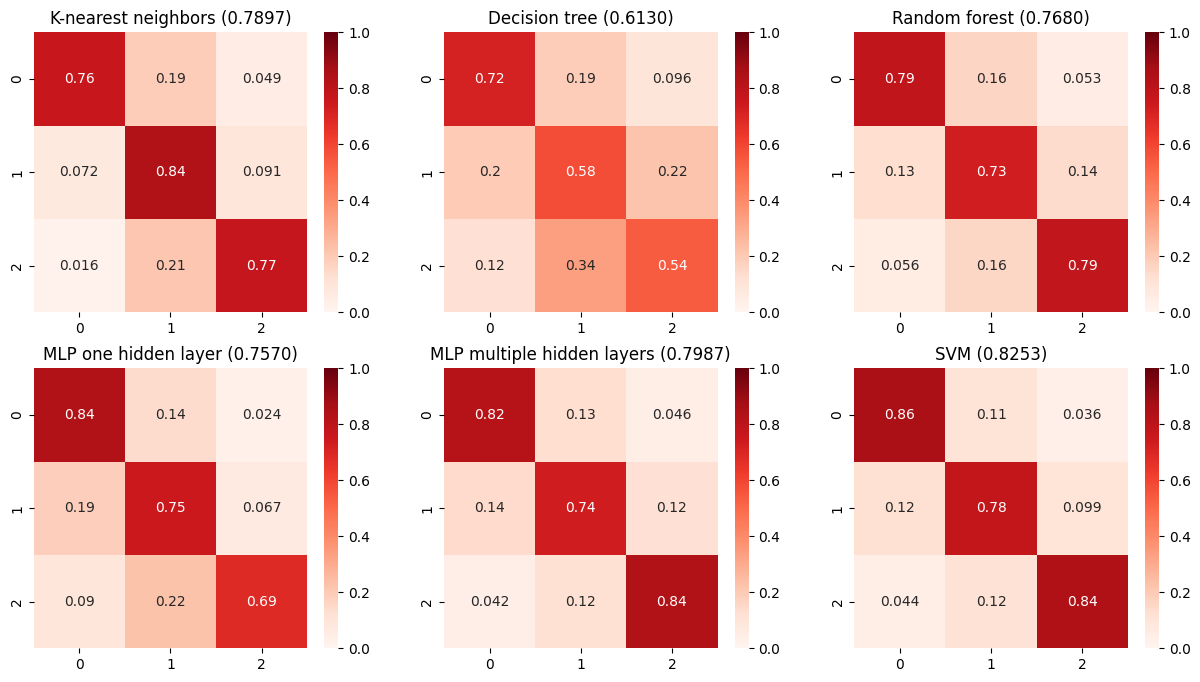

In [113]:
fig, axs = plt.subplots(2,3, figsize=(15,8))

sns.heatmap(cm_knn/cm_knn.sum(axis=1, keepdims=True), annot=True, ax=axs[0,0], cmap='Reds', vmin=0, vmax=1)
axs[0,0].set_title(f'K-nearest neighbors ({acc_knn:.4f})')
sns.heatmap(cm_dt/cm_dt.sum(axis=1, keepdims=True), annot=True, ax=axs[0,1], cmap='Reds', vmin=0, vmax=1)
axs[0,1].set_title(f'Decision tree ({acc_dt:.4f})')
sns.heatmap(cm_rf/cm_rf.sum(axis=1, keepdims=True), annot=True, ax=axs[0,2], cmap='Reds', vmin=0, vmax=1)
axs[0,2].set_title(f'Random forest ({acc_rf:.4f})')
sns.heatmap(cm_mlp1/cm_mlp1.sum(axis=1, keepdims=True), annot=True, ax=axs[1,0], cmap='Reds', vmin=0, vmax=1)
axs[1,0].set_title(f'MLP one hidden layer ({acc_mlp1:.4f})')
sns.heatmap(cm_mlp2/cm_mlp2.sum(axis=1, keepdims=True), annot=True, ax=axs[1,1], cmap='Reds', vmin=0, vmax=1)
axs[1,1].set_title(f'MLP multiple hidden layers ({acc_mlp2:.4f})')
sns.heatmap(cm_svm/cm_svm.sum(axis=1, keepdims=True), annot=True, ax=axs[1,2], cmap='Reds', vmin=0, vmax=1)
axs[1,2].set_title(f'SVM ({acc_svm:.4f})')

plt.show()